In [31]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [32]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [33]:
merged_df = pd.concat([df_train, df_test], ignore_index=True)
merged_df

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,genre_ska,genre_sleep,genre_songwriter,genre_soul,genre_spanish,genre_swedish,genre_tango,genre_techno,genre_trance,genre_trip-hop
0,5,0.0953,0.256,-18.389,0.0388,0.775000,0.815000,0.1270,0.0393,84.393,...,0,0,0,0,0,0,0,0,0,0
1,3,0.3780,0.629,-4.456,0.0541,0.019600,0.000000,0.1340,0.4090,95.124,...,1,0,0,0,0,0,0,0,0,0
2,5,0.3060,0.953,-4.159,0.0618,0.001660,0.002260,0.3860,0.2570,83.328,...,0,0,0,0,0,0,0,0,0,0
3,5,0.6110,0.792,-5.486,0.3060,0.170000,0.000000,0.0779,0.8510,105.256,...,0,0,0,0,0,0,0,0,0,0
4,9,0.6370,0.457,-10.614,0.0445,0.148000,0.836000,0.1180,0.2820,86.237,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,1,0.3060,0.693,-16.779,0.0360,0.000003,0.926000,0.1630,0.5960,107.526,...,0,0,0,0,0,0,0,0,0,0
119996,1,0.2310,0.493,-7.878,0.0384,0.390000,0.000000,0.7850,0.2110,139.583,...,0,0,0,0,0,0,0,0,0,0
119997,7,0.8380,0.539,-7.212,0.1110,0.501000,0.002540,0.0869,0.9300,106.027,...,0,0,0,0,0,0,0,0,0,0
119998,9,0.3240,0.972,-2.562,0.0967,0.000126,0.000876,0.1280,0.3770,139.922,...,0,0,0,0,0,0,0,0,0,0


## Method 1: Principle component analysis (PCA)

In [34]:
# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_df.select_dtypes(include=[float, int]))

In [35]:
# Performing PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

In [36]:
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(len(merged_df.columns))])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108
0,4.270245,-1.931449,0.635831,0.449277,-0.141012,-1.781005,-0.357385,0.836487,0.665731,-1.262180,...,-0.153209,1.097858,0.200187,0.068252,-0.361440,-0.093365,-0.140617,0.200361,-0.021833,-0.013918
1,-0.940508,-0.143534,-0.007928,-0.793443,1.957542,-0.501388,0.761537,-0.920744,-0.626293,-1.378327,...,-0.650435,0.124881,-0.422336,0.065419,-0.146971,0.162996,-0.003964,0.599821,-0.045803,-0.018430
2,-1.172755,0.208939,1.574206,-1.299431,1.193936,-1.703923,0.564693,1.027375,0.023516,-1.362145,...,-0.303144,0.150733,-0.133202,0.029585,-0.169623,-0.116970,-0.134241,-0.102586,-0.017016,-0.013988
3,-1.643333,1.719437,-1.702382,0.960108,-0.409730,0.608653,0.160855,-1.629044,2.351283,-0.294768,...,0.201247,0.558782,-0.392974,-0.150180,-0.849510,0.208524,-0.102807,0.063708,-0.003202,-0.004387
4,0.435354,-1.554688,-0.478303,0.396659,-1.667650,-0.534310,0.892264,-0.075653,-0.433290,0.491323,...,0.143092,-0.338602,-0.916978,-0.119458,0.134087,0.279234,1.004228,0.160397,-0.021322,-0.012151


In [37]:
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([3.68311302e-02, 2.00366338e-02, 1.91428352e-02, 1.53759706e-02,
       1.43036587e-02, 1.33644695e-02, 1.20374621e-02, 1.12941663e-02,
       1.09970981e-02, 1.05544655e-02, 1.05029126e-02, 1.04059717e-02,
       1.03911193e-02, 1.02366887e-02, 1.01893191e-02, 1.01071444e-02,
       1.00530855e-02, 1.00290572e-02, 9.97594062e-03, 9.73741085e-03,
       9.70837487e-03, 9.65198215e-03, 9.58895309e-03, 9.56577723e-03,
       9.46677608e-03, 9.45467656e-03, 9.45200276e-03, 9.44701619e-03,
       9.44037185e-03, 9.43149102e-03, 9.43022334e-03, 9.43015504e-03,
       9.42397713e-03, 9.42347322e-03, 9.41952674e-03, 9.41568363e-03,
       9.41426986e-03, 9.41053237e-03, 9.40817989e-03, 9.40530076e-03,
       9.39993336e-03, 9.39740033e-03, 9.39582753e-03, 9.39415876e-03,
       9.38978567e-03, 9.38718985e-03, 9.38579980e-03, 9.38194298e-03,
       9.37984776e-03, 9.37750466e-03, 9.37359442e-03, 9.37031012e-03,
       9.36841813e-03, 9.36681816e-03, 9.36597795e-03, 9.36238714e-03,
      

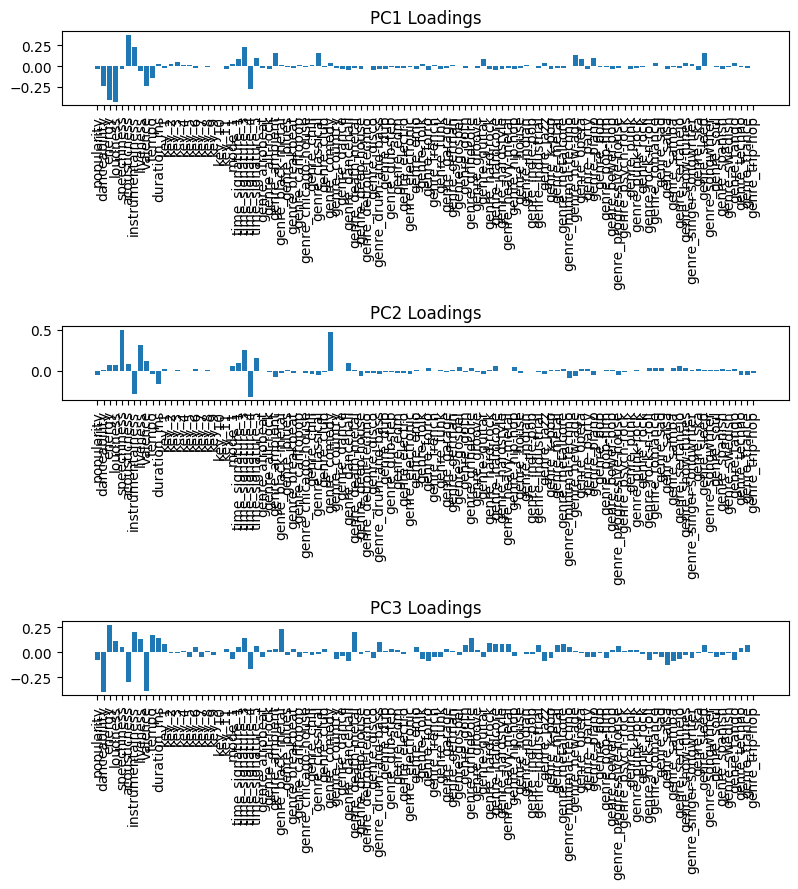

In [38]:
loadings = pca.components_

numerical_data = merged_df.select_dtypes(include=[np.number])

# Plotting the loadings for the first few PCs
num_features = len(merged_df.columns)
num_pcs = 3 

fig, axes = plt.subplots(num_pcs, 1, figsize=(8, num_pcs*3))
for i, ax in enumerate(axes):
    ax.bar(range(num_features), loadings[i, :])
    ax.set_title(f'PC{i+1} Loadings')
    ax.set_xticks(range(num_features))
    ax.set_xticklabels(merged_df.columns, rotation=90)

plt.tight_layout()
plt.show()

- A long bar means that the feature has a strong influence on the principal component, either positive or negative.
- Features with positive bars contribute positively to the principal component. 
- Features with negative bars contribute inversely to the principal component. 
- A feature that has long bars in multiple principal components has a more complex role in the dataset as it influences multiple patterns captured by the PCA.

In [39]:
def get_important_features(loadings, features, pc_index, n_top_features=5):
    pc_loadings = loadings[pc_index]
    sorted_indices = np.argsort(np.abs(pc_loadings))[::-1][:n_top_features]
    return features[sorted_indices], pc_loadings[sorted_indices]


In [40]:
for i in range(3):
    features, feature_loadings = get_important_features(loadings, numerical_data.columns, i)
    print(f"PC{i+1} important features:")
    for f, l in zip(features, feature_loadings):
        print(f"{f}: {l:.4f}")
    print()

PC1 important features:
loudness: -0.4265
energy: -0.4088
acousticness: 0.3754
time_signature_4: -0.2719
valence: -0.2435

PC2 important features:
speechiness: 0.4992
genre_comedy: 0.4679
time_signature_4: -0.3188
liveness: 0.3144
instrumentalness: -0.2807

PC3 important features:
danceability: -0.3944
valence: -0.3886
acousticness: -0.2983
energy: 0.2743
genre_black-metal: 0.2330



### Finding features that are important as a whole

- simply aggregation of the features from each PC may not give an accurate representation of overall importance
- scoring features by summing the squared loadings across the components 

In [41]:
def get_overall_important_features(loadings, feature_names, n_components=3, n_top_features=5):
    # Sum the squares of the loadings
    loading_squares = np.square(loadings[:n_components]).sum(axis=0)
    # Get the indices of the top features
    top_feature_indices = np.argsort(loading_squares)[::-1][:n_top_features]

    top_features = feature_names[top_feature_indices]
    top_scores = loading_squares[top_feature_indices]
    return top_features, top_scores

In [42]:
overall_important_features, overall_scores = get_overall_important_features(
    loadings, numerical_data.columns, n_components=3, n_top_features=5)

print("Overall important features:")
for feature, score in zip(overall_important_features, overall_scores):
    print(f"{feature}: {score:.4f}")


Overall important features:
speechiness: 0.2537
energy: 0.2468
acousticness: 0.2372
valence: 0.2245
genre_comedy: 0.2200


## Method 2 - Lasso L1

In [43]:
X = merged_df.drop(columns=['popularity'])
y = merged_df['popularity']

In [44]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# Lasso model with CV
lasso = LassoCV(cv=5, random_state=0).fit(X_scaled, y)
lasso_coef = lasso.coef_

In [46]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_coef
})

feature_importance_sorted = feature_importance.loc[lasso_coef.nonzero()].sort_values(
    by='Coefficient', key=np.abs, ascending=False
)

feature_importance_sorted.reset_index(drop=True, inplace=True)

In [47]:
feature_importance_sorted

,Feature,Coefficient
0,genre_alt-rock,0.458581
1,valence,-0.369418
2,genre_folk,0.333080
3,genre_grindcore,-0.319416
4,genre_jazz,0.301444
...,...,...
101,genre_swedish,-0.005792
102,genre_garage,0.005757
103,key_3,0.004433
104,genre_disco,0.003301


### Not very helpful results

## Method 3 - Random Forest (feature_importances_ attribute)

In [48]:
X_train = df_train.drop(columns=['popularity'])
X_test= df_test.drop(columns=['popularity'])
y_train=df_train['popularity']
y_test=df_test['popularity']

In [49]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
feature_importances = rf.feature_importances_

In [51]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [52]:
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)
sorted_feature_importance.reset_index(drop=True, inplace=True)
sorted_feature_importance.head(10)

,Feature,Importance
0,duration_ms,0.086316
1,loudness,0.070166
2,valence,0.068332
3,danceability,0.065416
4,tempo,0.064000
5,speechiness,0.063469
6,acousticness,0.063322
7,liveness,0.061181
8,energy,0.057504
9,instrumentalness,0.051787


### Results almost coincide with PCA